# **Import and QA the Data**

In [2]:
import pandas as pd

customer = pd.read_excel('../../Desktop/Maven/Python/Projects/Bank_Churn_Messy.xlsx')
customer.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58


In [3]:
account = pd.read_excel('../../Desktop/Maven/Python/Projects/Bank_Churn_Messy.xlsx', sheet_name=1)
account.head(2)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1


In [4]:
churn_df = customer.merge(account, how='left', on='CustomerId')
churn_df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1


### Drop Duplicates

In [6]:
churn_df = churn_df.drop(columns=['Tenure_y']).rename({'Tenure_x': 'Tenure'}, axis=1).drop_duplicates()


In [7]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


# **Clean the Data**

In [10]:
churn_df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0


In [11]:
churn_df['EstimatedSalary'] = churn_df.EstimatedSalary.str.replace('€', '', regex=True).astype('float')

In [12]:
churn_df['Balance'] = pd.to_numeric(churn_df.Balance.str.replace('€', '', regex=True))

In [13]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


## Checking for Missing Values

### Imputing categorical variables with 'MISSING'

In [16]:
churn_df[churn_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [17]:
import numpy as np
for col in churn_df.select_dtypes('object').columns:
    churn_df[col] = np.where(churn_df[col].isna(), 'MISSING', churn_df[col])

In [18]:
churn_df[churn_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


### Imputing Numeric Columns with the median

In [20]:
for col in churn_df.select_dtypes('number').columns:
    churn_df[col] = churn_df[col].fillna(churn_df[col].median())

In [21]:
churn_df[churn_df.isna().any(axis=1)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited


In [22]:
churn_df.describe().round(2)

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,99762.20,76485.89,1.53,0.2
std,71936.19,96.65,10.49,2.89,60583.86,62397.41,0.58,0.4
min,15565701.00,350.00,18.00,0.00,-999999.00,0.00,1.00,0.0
25%,15628528.25,584.00,32.00,3.00,50910.68,0.00,1.00,0.0
50%,15690738.00,652.00,37.00,5.00,100191.72,97198.54,1.00,0.0
75%,15753233.75,718.00,44.00,7.00,149388.25,127644.24,2.00,0.0
max,15815690.00,850.00,92.00,10.00,199992.48,250898.09,4.00,1.0


In [23]:
churn_df[churn_df['EstimatedSalary'] == -999999.00]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [24]:
churn_df['EstimatedSalary'] = np.where(churn_df.EstimatedSalary == -999999.0, churn_df.EstimatedSalary.median(), churn_df.EstimatedSalary)

In [25]:
churn_df.EstimatedSalary.describe()

count     10000.000000
mean     100092.252506
std       57510.146401
min          11.580000
25%       51002.110000
50%      100196.062500
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [26]:
churn_df.Geography.value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [27]:
geo_map = {
    'Germany': 'Germany',
    'France': 'France',
    'Spain': 'Spain',
    'French': 'France',
    'FRA': 'France'}

In [28]:
churn_df['Geography'] = churn_df['Geography'].map(geo_map)
churn_df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# **Explore the Data**

### Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
churn_df.Exited.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

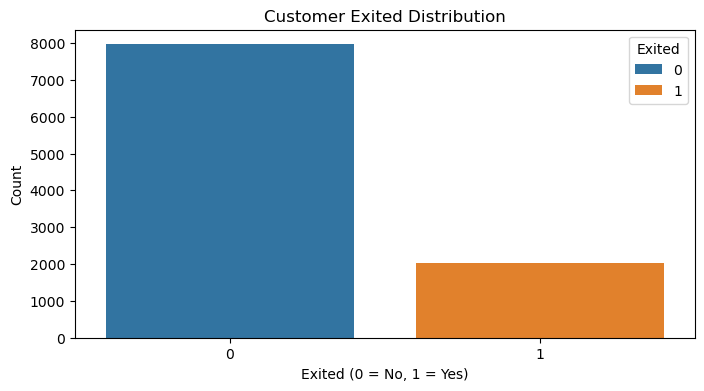

In [33]:
# Create a count plot for the Exited column
plt.figure(figsize=(8, 4))  # Optional: adjust figure size for better readability
sns.countplot(x='Exited', data=churn_df, hue='Exited')

# Add labels and title
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Customer Exited Distribution")
plt.show()


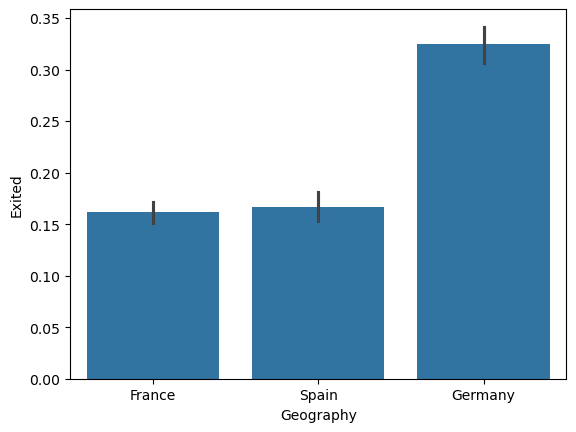

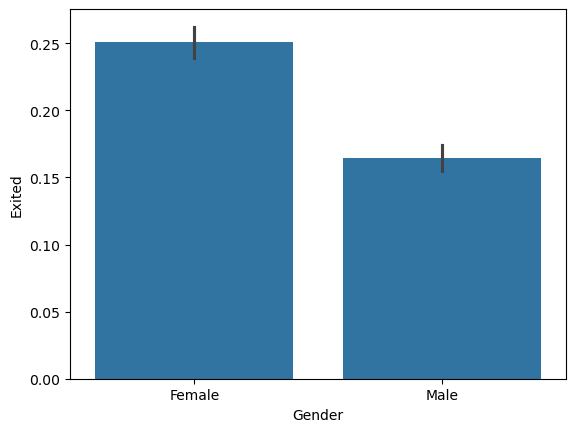

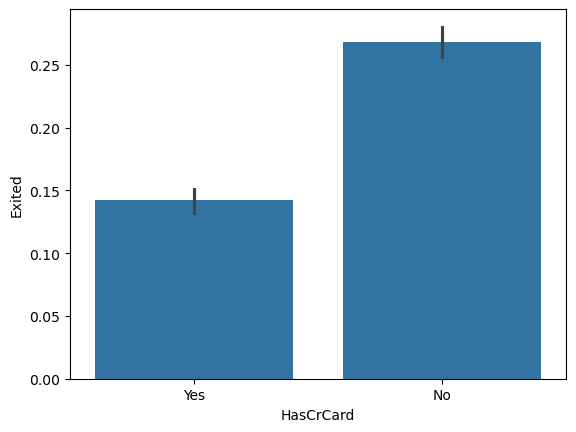

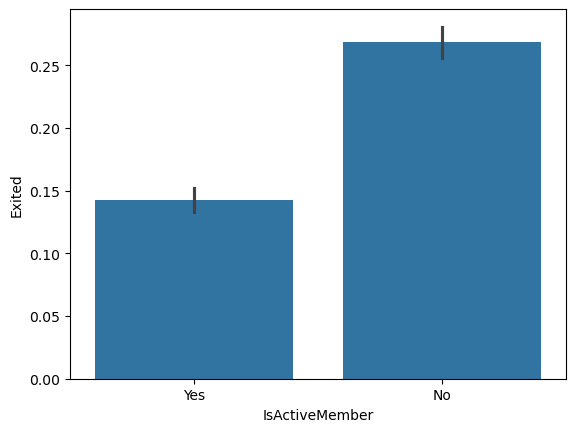

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in churn_df.drop('Surname', axis=1).select_dtypes('object'):
    sns.barplot(data=churn_df, x=col, y='Exited')
    plt.show()

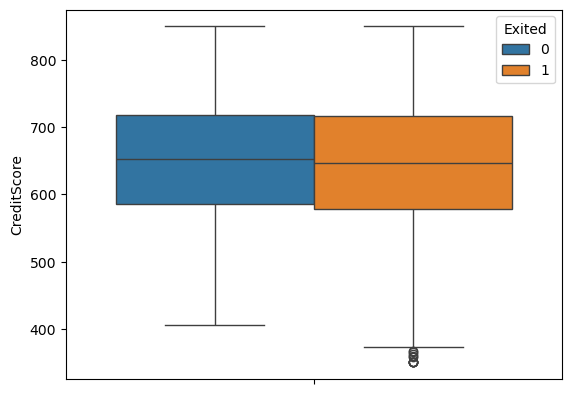

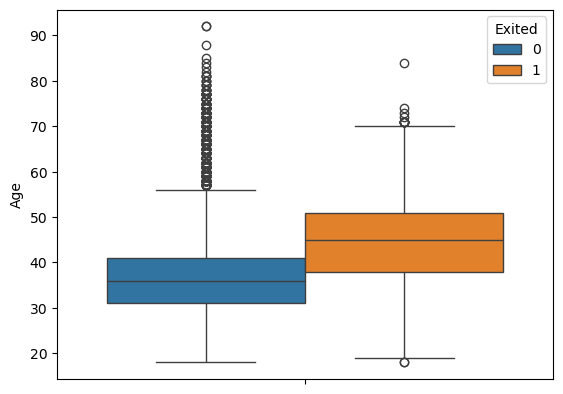

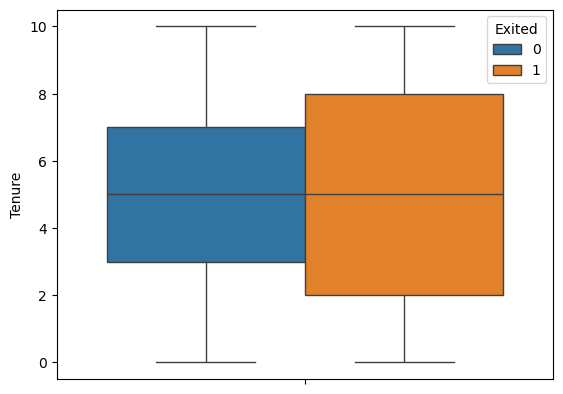

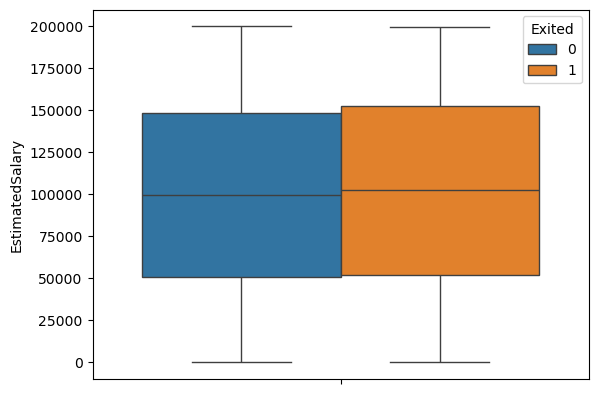

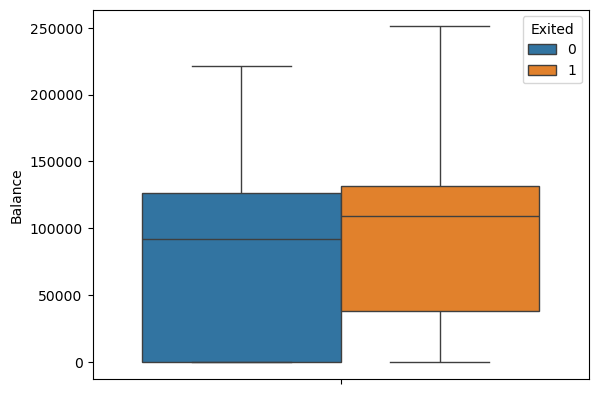

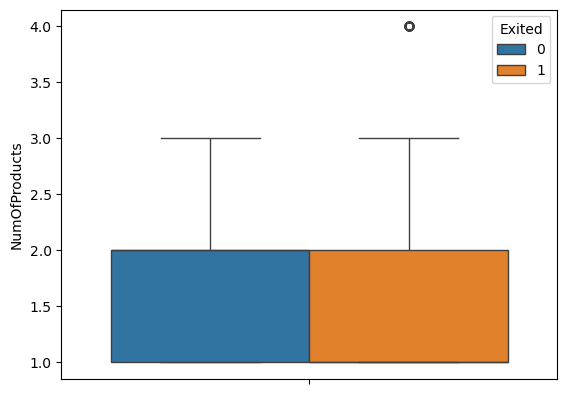

In [35]:
for col in churn_df.drop(['CustomerId','Exited'], axis=1).select_dtypes('number'):
    sns.boxplot(data=churn_df, y=col, hue='Exited')
    plt.show()

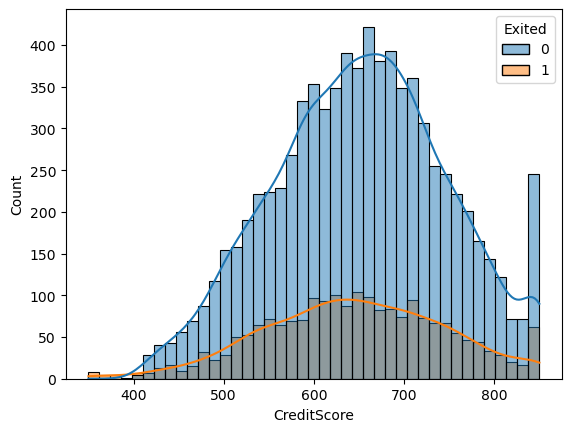

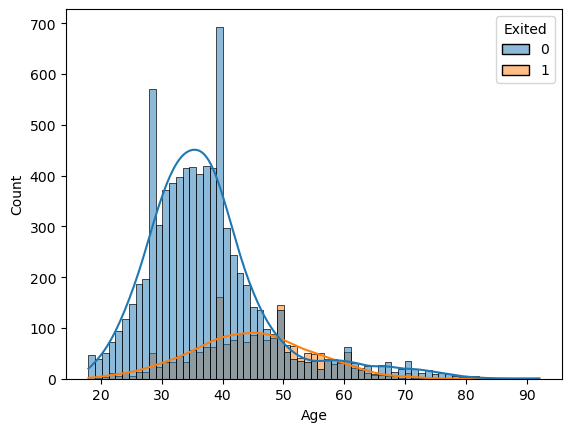

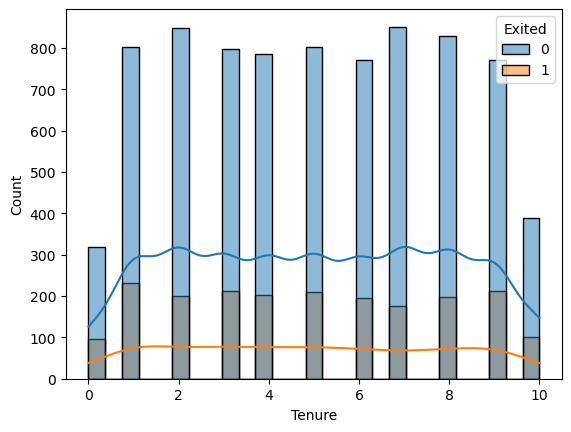

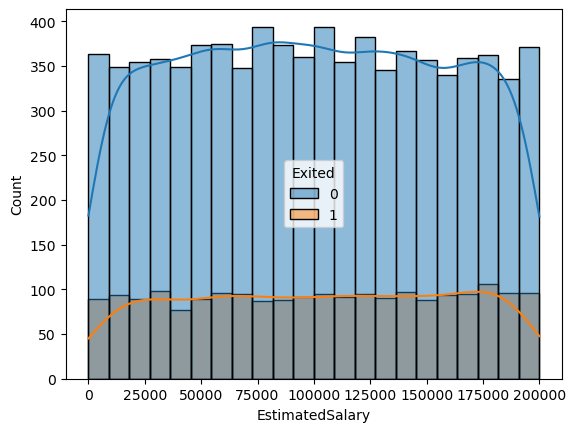

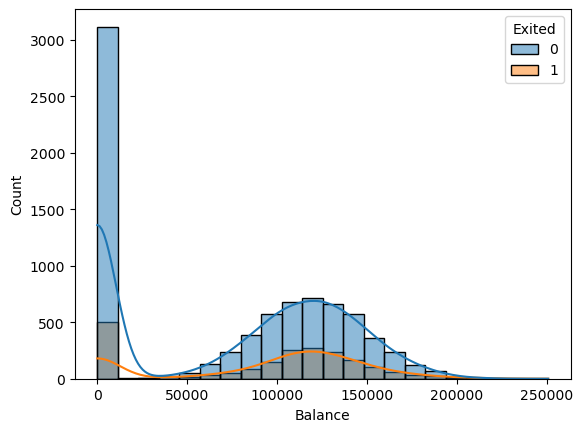

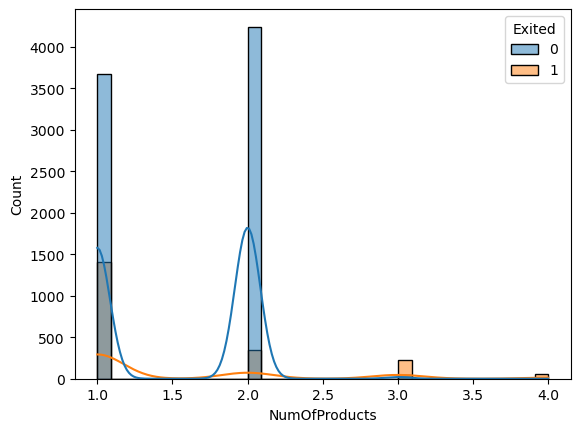

In [36]:
for col in churn_df.drop(['CustomerId','Exited'], axis=1).select_dtypes('number'):
    sns.histplot(data=churn_df, x=col, hue='Exited', kde=True)
    plt.show()

# **Prepare the Data for Modeling**

### Drop Columns 

In [39]:
churn_df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0


In [40]:
modelling_df = churn_df.drop(columns=['CustomerId', 'Surname'])

modelling_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0


In [41]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


## Create Dummy Variables for Categirical Fields

In [43]:
modelling_df = pd.get_dummies(modelling_df, dtype='int', drop_first=True)
modelling_df.head(2)

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1


### Feature Engineering

In [45]:
modelling_df['balance_v_income'] = modelling_df.Balance / modelling_df.EstimatedSalary
modelling_df.head(2)

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,balance_v_income
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677


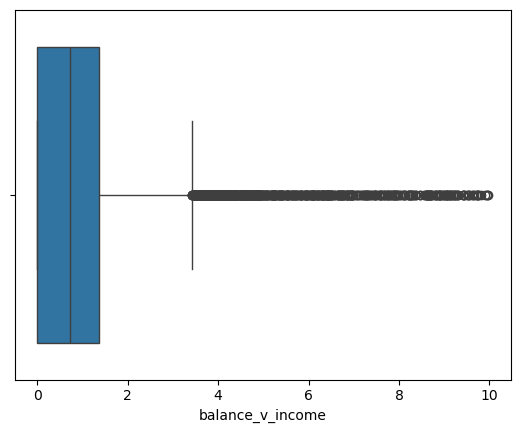

In [82]:
sns.boxplot(data=modelling_df.query('balance_v_income < 10'), x='balance_v_income');

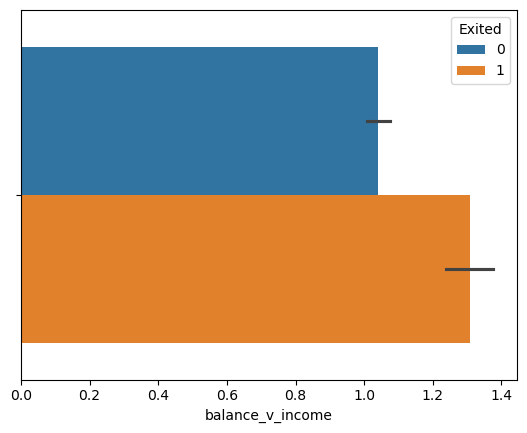

In [84]:
sns.barplot(data=modelling_df.query('balance_v_income < 10'), x='balance_v_income', hue='Exited');